## ML 과제

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [138]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### 0. Titanic 데이터 로드 및 훓어보기

In [139]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()
titanic_org=titanic

In [140]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.
display(titanic.info())

display(titanic['Survived'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

0    549
1    342
Name: Survived, dtype: int64

In [141]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna('N', inplace=True)



In [142]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!
y=titanic['Survived']
titanic.drop(['Survived','PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X=titanic


In [143]:
display(X.head(10))
display(y.head(10))


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S
9,2,female,14.000000,1,0,30.0708,C


0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [144]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

X=pd.get_dummies(X)


### 1. Train-Test split & 종속변수-설명변수 분할

In [145]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)

### 2. Decision Tree를 통한 Classification

In [146]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.


##### <b>줄글 답안</b>
> 

In [147]:
from scipy.stats import entropy
sur_Pclass1=y[X['Pclass']==1]
sur_Pclass2=y[X['Pclass']==2]
sur_Pclass3=y[X['Pclass']==3]

etp_Pclass1=-(sur_Pclass1[sur_Pclass1==0].shape[0]/sur_Pclass1.shape[0]) * np.log2(sur_Pclass1[sur_Pclass1==0].shape[0]/sur_Pclass1.shape[0])\
            -(sur_Pclass1[sur_Pclass1==1].shape[0]/sur_Pclass1.shape[0]) * np.log2(sur_Pclass1[sur_Pclass1==1].shape[0]/sur_Pclass1.shape[0])
etp_Pclass2=-(sur_Pclass2[sur_Pclass2==0].shape[0]/sur_Pclass2.shape[0]) * np.log2(sur_Pclass2[sur_Pclass2==0].shape[0]/sur_Pclass2.shape[0])\
            -(sur_Pclass2[sur_Pclass2==1].shape[0]/sur_Pclass2.shape[0]) * np.log2(sur_Pclass2[sur_Pclass2==1].shape[0]/sur_Pclass2.shape[0])
etp_Pclass3=-(sur_Pclass3[sur_Pclass3==0].shape[0]/sur_Pclass3.shape[0]) * np.log2(sur_Pclass3[sur_Pclass3==0].shape[0]/sur_Pclass3.shape[0])\
            -(sur_Pclass3[sur_Pclass3==1].shape[0]/sur_Pclass3.shape[0]) * np.log2(sur_Pclass3[sur_Pclass3==1].shape[0]/sur_Pclass3.shape[0])
etp_total=sur_Pclass1.shape[0]/X.shape[0] * etp_Pclass1\
        +sur_Pclass2.shape[0]/X.shape[0] * etp_Pclass2\
        +sur_Pclass3.shape[0]/X.shape[0] * etp_Pclass3

1-etp_total

0.12312314342036468

In [148]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy', min_samples_split=3, random_state=156)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=3,
                       random_state=156)

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

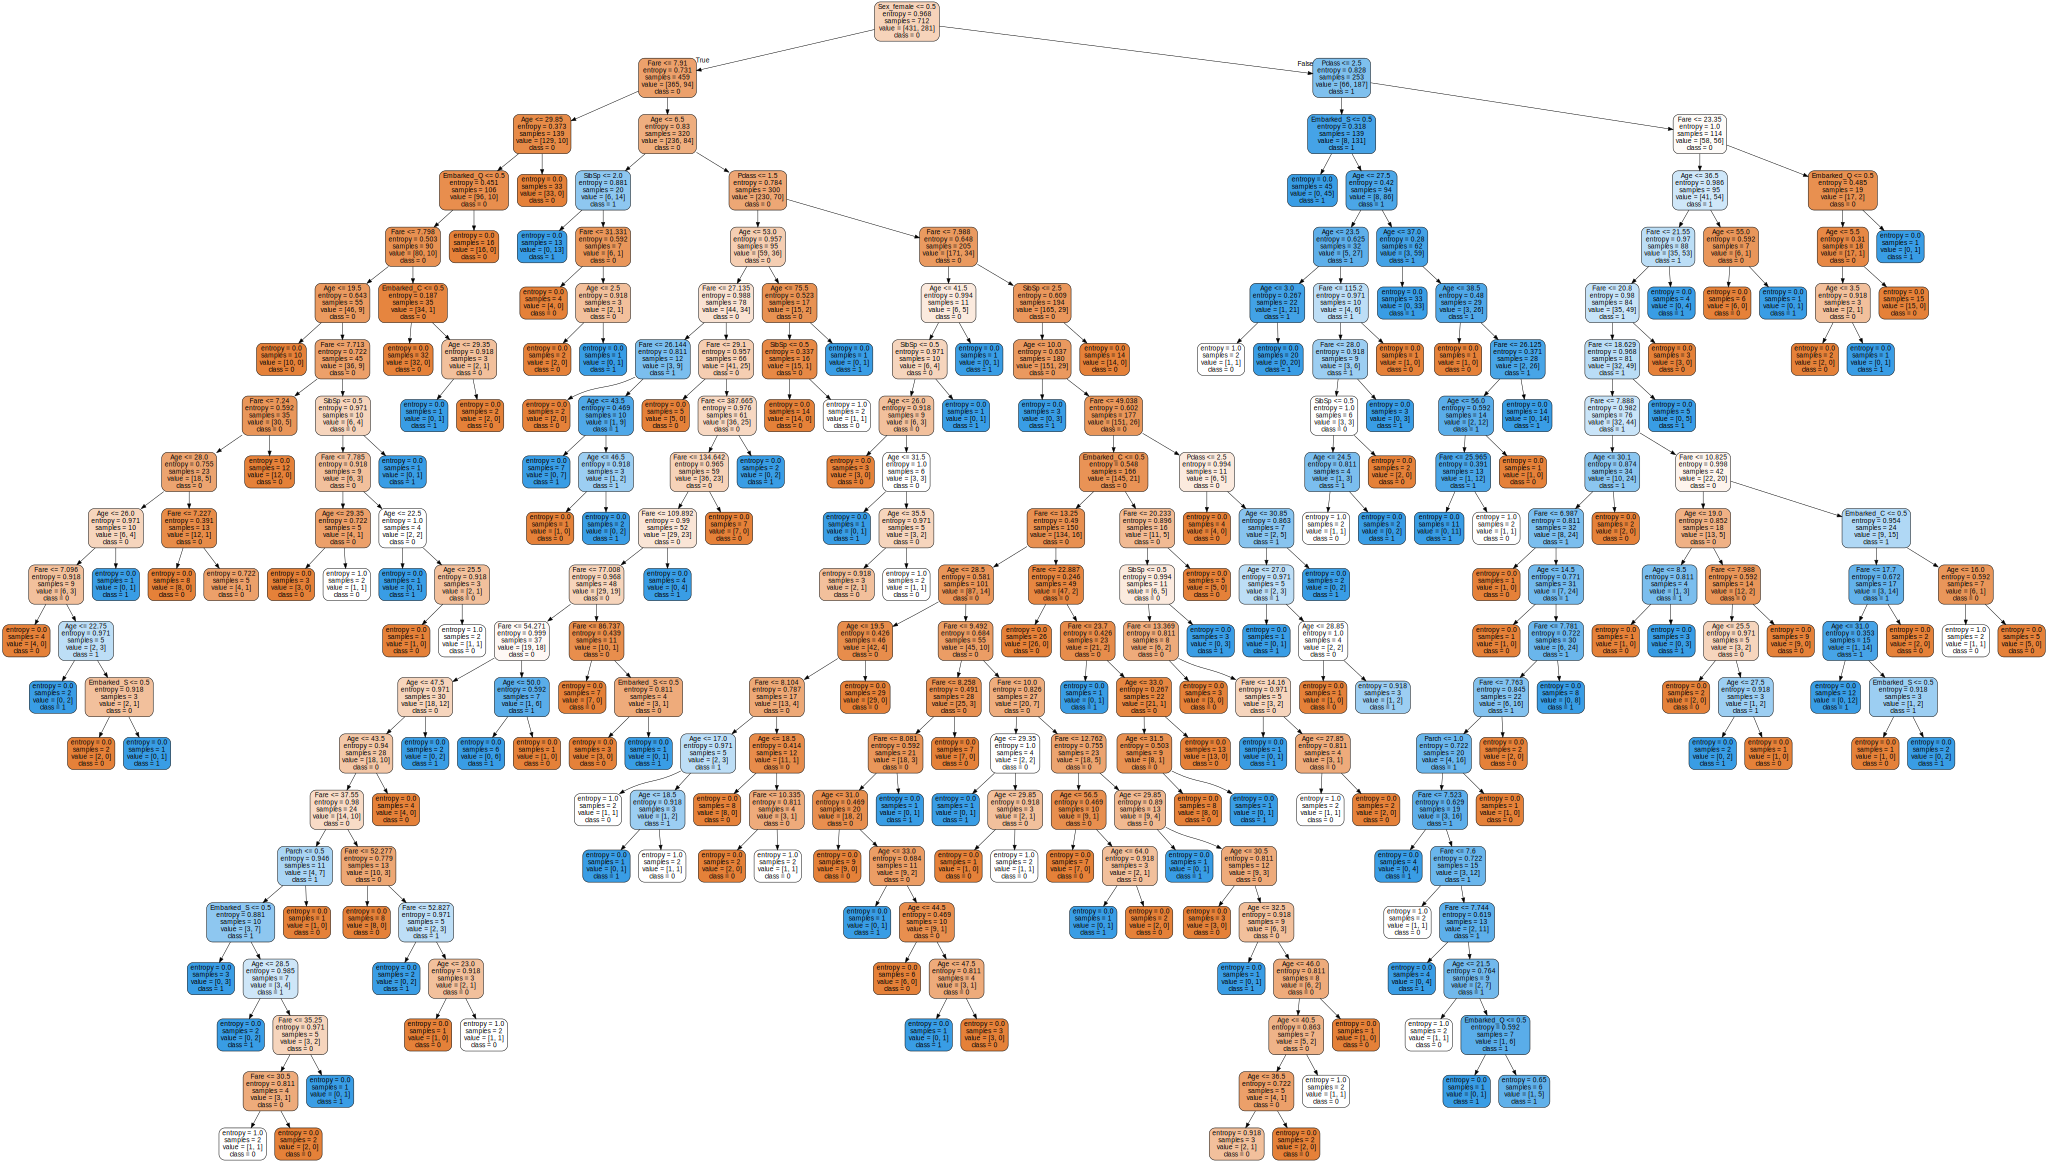

In [149]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file=("titanic_hw.dot"),
                feature_names=x_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [150]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
y_pred=dt_clf.predict(x_test)
print('정확도: ',accuracy_score(y_pred, y_test))
print('f1 score: ',f1_score(y_pred, y_test))
print('roc_auc_score: ',roc_auc_score(y_pred, y_test))
print('confusion_matrix: ',confusion_matrix(y_pred, y_test))
#display('classification report: ',classification_report(y_pred, y_test))
print(classification_report(y_pred, y_test))

정확도:  0.7486033519553073
f1 score:  0.6218487394957983
roc_auc_score:  0.7197919635223711
confusion_matrix:  [[97 24]
 [21 37]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       121
           1       0.61      0.64      0.62        58

    accuracy                           0.75       179
   macro avg       0.71      0.72      0.72       179
weighted avg       0.75      0.75      0.75       179



### 5. GridSearch를 통한 Tree pruning

In [151]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.
from sklearn.model_selection import GridSearchCV
grid_params={'max_depth':[3,4,5],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[3,5,7]
            }
grid_dt=GridSearchCV(dt_clf, param_grid=grid_params, cv=3, refit=True)
grid_dt.fit(x_train, y_train)
scores_df=pd.DataFrame(grid_dt.cv_results_)


In [152]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.

display(scores_df[['params', 'mean_test_score', 'rank_test_score']])
print('최적 parameter: ', grid_dt.best_params_)
print('validation score: ', grid_dt.best_score_)
best_estimator=grid_dt.best_estimator_
grid_pred=best_estimator.predict(x_test)
print('Test score: ', accuracy_score(grid_pred, y_test))

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.793568,7
1,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.793568,7
2,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.793568,7
3,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.794957,1
4,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.794957,1
5,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.794957,1
6,"{'max_depth': 3, 'min_samples_leaf': 7, 'min_s...",0.794957,1
7,"{'max_depth': 3, 'min_samples_leaf': 7, 'min_s...",0.794957,1
8,"{'max_depth': 3, 'min_samples_leaf': 7, 'min_s...",0.794957,1
9,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.787942,22


최적 parameter:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
validation score:  0.7949568012859153
Test score:  0.8659217877094972


In [153]:
## GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
## ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
## hint) Shift+tab

max_depth : 트리의 최대 깊이, 아직 분류가 덜 됐다 하더라도 노드가 max_depth이상으로 분할되지 않음
min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 수. 이것보다 샘플 수가 낮으면 leaf로 확정되고 더이상 분할하지 않음.
min_samples_split: 분할 전 노드의 최소한의 샘플 수. 이것보다 샘플 수가 낮으면 leaf노드가 아니더라도 분할을 하지 않음.




SyntaxError: invalid syntax (<ipython-input-153-5ee5fa9858d9>, line 5)

> ### <b>고생하셨습니다~</b>

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!